In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()
RMSpropmodel = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
RMSpropmodel.summary()
SGDmodel = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
SGDmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
h = model.fit(x=X_train, y=Y_train, epochs=13, validation_split=0.3, batch_size=256)

Epoch 1/13
137/137 [==============================] - 14s 21ms/step - loss: 1.9082 - accuracy: 0.2854 - val_loss: 1.6321 - val_accuracy: 0.3974
Epoch 2/13
137/137 [==============================] - 1s 11ms/step - loss: 1.5487 - accuracy: 0.4286 - val_loss: 1.4472 - val_accuracy: 0.4877
Epoch 3/13
137/137 [==============================] - 2s 11ms/step - loss: 1.3908 - accuracy: 0.4976 - val_loss: 1.2868 - val_accuracy: 0.5403
Epoch 4/13
137/137 [==============================] - 2s 12ms/step - loss: 1.2800 - accuracy: 0.5393 - val_loss: 1.2346 - val_accuracy: 0.5620
Epoch 5/13
137/137 [==============================] - 2s 13ms/step - loss: 1.1978 - accuracy: 0.5706 - val_loss: 1.1240 - val_accuracy: 0.5989
Epoch 6/13
137/137 [==============================] - 2s 13ms/step - loss: 1.1344 - accuracy: 0.5980 - val_loss: 1.0945 - val_accuracy: 0.6181
Epoch 7/13
137/137 [==============================] - 2s 11ms/step - loss: 1.0714 - accuracy: 0.6200 - val_loss: 1.0504 - val_accuracy: 0.630

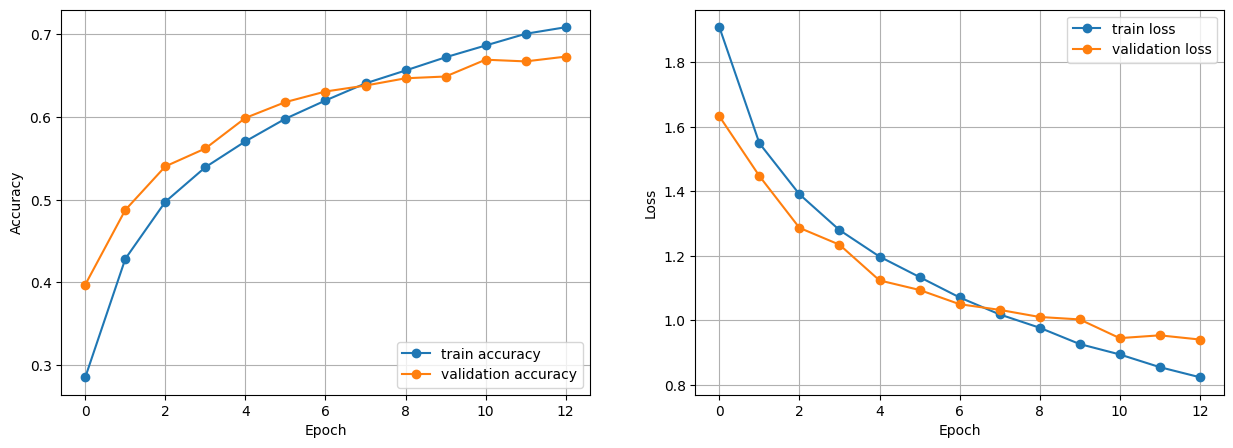

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
RMSpropmodel.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
RMSproph = RMSpropmodel.fit(x=X_train, y=Y_train, epochs=13, validation_split=0.3, batch_size=256)


Epoch 1/13
137/137 [==============================] - 5s 21ms/step - loss: 2.0968 - accuracy: 0.2210 - val_loss: 1.8224 - val_accuracy: 0.3468
Epoch 2/13
137/137 [==============================] - 1s 10ms/step - loss: 1.8087 - accuracy: 0.3436 - val_loss: 1.5799 - val_accuracy: 0.4336
Epoch 3/13
137/137 [==============================] - 1s 10ms/step - loss: 1.6445 - accuracy: 0.4048 - val_loss: 1.4783 - val_accuracy: 0.4714
Epoch 4/13
137/137 [==============================] - 1s 11ms/step - loss: 1.5429 - accuracy: 0.4468 - val_loss: 1.4382 - val_accuracy: 0.4827
Epoch 5/13
137/137 [==============================] - 2s 11ms/step - loss: 1.4610 - accuracy: 0.4790 - val_loss: 1.4045 - val_accuracy: 0.4904
Epoch 6/13
137/137 [==============================] - 1s 10ms/step - loss: 1.3943 - accuracy: 0.5022 - val_loss: 1.5246 - val_accuracy: 0.4705
Epoch 7/13
137/137 [==============================] - 1s 11ms/step - loss: 1.3338 - accuracy: 0.5243 - val_loss: 1.2775 - val_accuracy: 0.5411

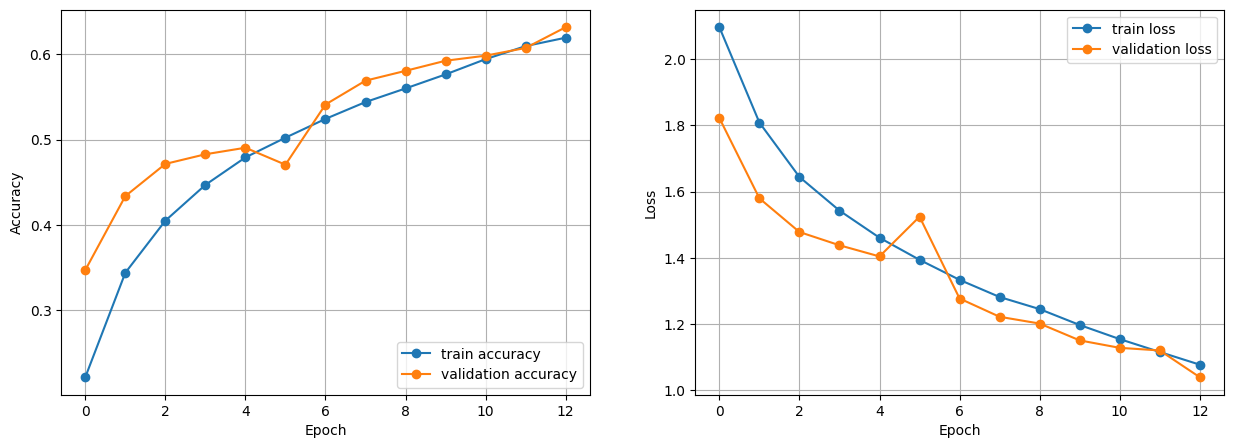

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(RMSproph.history['accuracy'], 'o-', label='train accuracy')
plt.plot(RMSproph.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(RMSproph.history['loss'], 'o-', label='train loss')
plt.plot(RMSproph.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [12]:
SGDmodel.compile(
    optimizer=keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
SGDh = SGDmodel.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.3, batch_size=256)

Epoch 1/10
137/137 [==============================] - 7s 42ms/step - loss: 2.2965 - accuracy: 0.1194 - val_loss: 2.2869 - val_accuracy: 0.1933
Epoch 2/10
137/137 [==============================] - 3s 23ms/step - loss: 2.2773 - accuracy: 0.1498 - val_loss: 2.2535 - val_accuracy: 0.1775
Epoch 3/10
137/137 [==============================] - 3s 25ms/step - loss: 2.2068 - accuracy: 0.1907 - val_loss: 2.1036 - val_accuracy: 0.2678
Epoch 4/10
137/137 [==============================] - 3s 23ms/step - loss: 2.0827 - accuracy: 0.2323 - val_loss: 2.0181 - val_accuracy: 0.2793
Epoch 5/10
137/137 [==============================] - 3s 25ms/step - loss: 2.0213 - accuracy: 0.2586 - val_loss: 1.9477 - val_accuracy: 0.3054
Epoch 6/10
137/137 [==============================] - 3s 24ms/step - loss: 1.9768 - accuracy: 0.2857 - val_loss: 1.8983 - val_accuracy: 0.3369
Epoch 7/10
137/137 [==============================] - 3s 24ms/step - loss: 1.9355 - accuracy: 0.3027 - val_loss: 1.8609 - val_accuracy: 0.3506

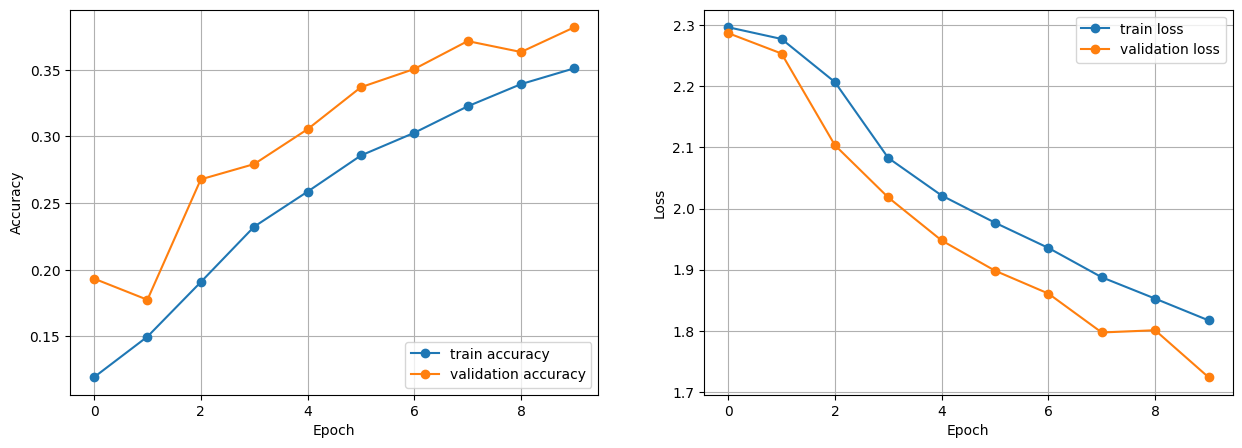

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(SGDh.history['accuracy'], 'o-', label='train accuracy')
plt.plot(SGDh.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(SGDh.history['loss'], 'o-', label='train loss')
plt.plot(SGDh.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()